In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
import seaborn as sns

sns.set(style='white', palette='deep', font='sans-serif', font_scale=1.5)

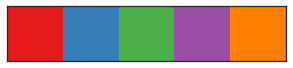

In [2]:
s = sns.color_palette("Set1", n_colors=5)
sns.palplot(s)

In [3]:
net = ['AttentiveFP', 'DMPNN', 'MMNF']
colors = [s[1], s[2], s[3]]


## 1) valid set

1.0    77
0.0    74
Name: Class, dtype: int64
[[54 20]
 [18 59]]


[[67  7]
 [33 44]]


[[62 12]
 [17 60]]




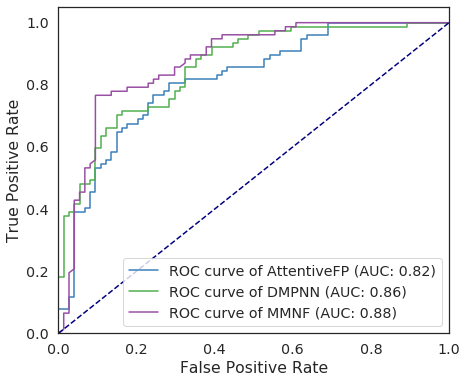

In [21]:
df_true = pd.read_csv('../data/val.csv')
attfp = pd.read_csv('../02_predict_DMPNN_attentiveFP/ATTFP_pred_val.csv')
dmpnn = pd.read_csv('../02_predict_DMPNN_attentiveFP/DMPNN_pred_val.csv')
mpr = pd.read_csv('./val.predict_prob.csv', index_col = 0)
df = df_true.join(mpr).join(dmpnn['Class'].to_frame(name = 'DMPNN'))
df = df.set_index('smiles').join(attfp.set_index('smiles'))
df = df.rename(columns = {'MMNF_prob':'MMNF', 'attfp_pred':'AttentiveFP'})

print(df.Class.value_counts())

y_test = df.Class.values
fpr = {}
tpr = {}
roc_auc = {}
for col in net:
    y_score = df[col].values
    fpr[col], tpr[col], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc[col] = auc(fpr[col], tpr[col])
    print(confusion_matrix(y_test.ravel(), y_score.ravel().round()))
    print('\n')
    
fig = plt.figure(figsize=(7,6))
lw = 1.5

for i, color in zip(net, colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of {0} (AUC: {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

fig.tight_layout()
fig.savefig('./valid.svg')

77.0

## test set

0.0    102
1.0     50
Name: Class, dtype: int64
[[86 16]
 [13 37]]


[[90 12]
 [17 33]]


[[89 13]
 [ 8 42]]




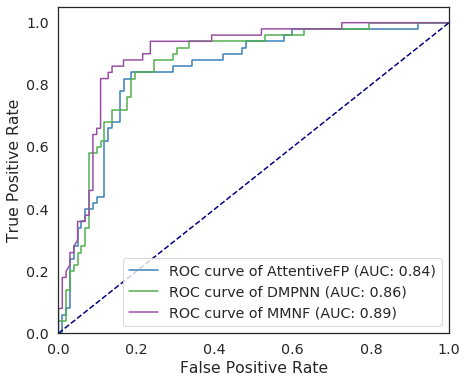

In [20]:
df_true = pd.read_csv('../data/test.csv')
attfp = pd.read_csv('../02_predict_DMPNN_attentiveFP/ATTFP_pred_test.csv')
dmpnn = pd.read_csv('../02_predict_DMPNN_attentiveFP/DMPNN_pred_test.csv')
mpr = pd.read_csv('./test.predict_prob.csv', index_col = 0)
df = df_true.join(mpr).join(dmpnn['Class'].to_frame(name = 'DMPNN'))
df = df.set_index('smiles').join(attfp.set_index('smiles'))
df = df.rename(columns = {'MMNF_prob':'MMNF', 'attfp_pred':'AttentiveFP'})

print(df.Class.value_counts())

y_test = df.Class.values
fpr = {}
tpr = {}
roc_auc = {}
for col in net:
    y_score = df[col].values
    fpr[col], tpr[col], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc[col] = auc(fpr[col], tpr[col])
    print(confusion_matrix(y_test.ravel(), y_score.ravel().round()))
    print('\n')
    
fig = plt.figure(figsize=(7,6))
lw = 1.5

for i, color in zip(net, colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of {0} (AUC: {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
fig.tight_layout()
fig.savefig('./test.svg')

## novel set

395 395
1    216
0    179
Name: Class, dtype: int64
[[113  66]
 [ 79 137]]


[[145  34]
 [113 103]]


[[150  29]
 [ 65 151]]




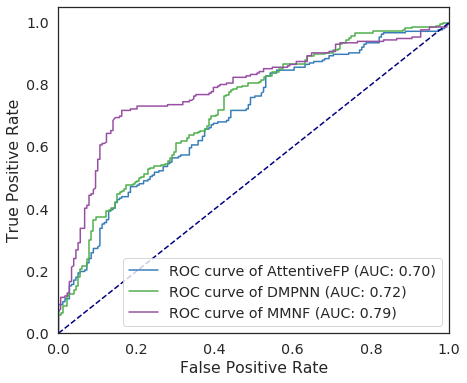

In [22]:
df_true = pd.read_csv('../data/bace_chembl_novel.csv')
attfp = pd.read_csv('../02_predict_DMPNN_attentiveFP/ATTFP_pred_novel.csv')
dmpnn = pd.read_csv('../02_predict_DMPNN_attentiveFP/DMPNN_pred_novel.csv')
mpr = pd.read_csv('./chembl_novel.predict_prob.csv', index_col = 0)
df = df_true.join(mpr).join(dmpnn['Class'].to_frame(name = 'DMPNN'))
df = df.set_index('smiles').join(attfp.set_index('smiles'))
df = df.rename(columns = {'MMNF_prob':'MMNF', 'attfp_pred':'AttentiveFP'})
df = df.fillna(0)
print(len(df) , len(df_true))
print(df.Class.value_counts())

y_test = df.Class.values
fpr = {}
tpr = {}
roc_auc = {}
for col in net:
    y_score = df[col].values
    fpr[col], tpr[col], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc[col] = auc(fpr[col], tpr[col])
    print(confusion_matrix(y_test.ravel(), y_score.ravel().round()))
    print('\n')
    
fig = plt.figure(figsize=(7,6))
lw = 1.5

for i, color in zip(net, colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of {0} (AUC: {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
fig.tight_layout()
fig.savefig('./novel.svg')

## common set

5325 5325
0    3248
1    2077
Name: Class, dtype: int64
[[2543  705]
 [ 692 1385]]


[[2738  510]
 [ 993 1084]]


[[2629  619]
 [ 306 1771]]




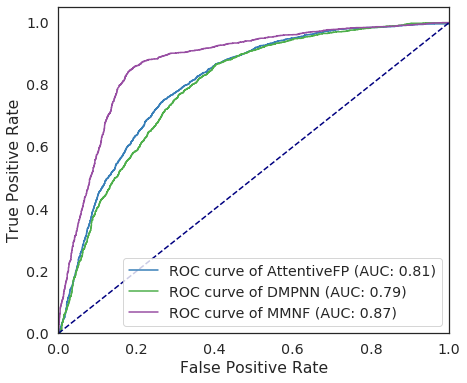

In [23]:
df_true = pd.read_csv('../data/bace_chembl_common.csv')
attfp = pd.read_csv('../02_predict_DMPNN_attentiveFP/ATTFP_pred_common.csv')
dmpnn = pd.read_csv('../02_predict_DMPNN_attentiveFP/DMPNN_pred_common.csv')
mpr = pd.read_csv('./chembl_common.predict_prob.csv', index_col = 0)
df = df_true.join(mpr).join(dmpnn['Class'].to_frame(name = 'DMPNN'))
df = df.set_index('smiles').join(attfp.set_index('smiles'))
df = df.rename(columns = {'MMNF_prob':'MMNF', 'attfp_pred':'AttentiveFP'})
df = df.fillna(0)
print(len(df) , len(df_true))
print(df.Class.value_counts())
y_test = df.Class.values
fpr = {}
tpr = {}
roc_auc = {}
for col in net:
    y_score = df[col].values
    fpr[col], tpr[col], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc[col] = auc(fpr[col], tpr[col])
    print(confusion_matrix(y_test.ravel(), y_score.ravel().round()))
    print('\n')
fig = plt.figure(figsize=(7,6))
lw = 1.5

for i, color in zip(net, colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of {0} (AUC: {1:0.2f})'
             ''.format(i, roc_auc[i]))

    
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
fig.tight_layout()
fig.savefig('./common.svg')

## clinical drugs

In [8]:
df_true = pd.read_csv('../data/drugs.csv')
attfp = pd.read_csv('../02_predict_DMPNN_attentiveFP/ATTFP_pred_drug.csv')
dmpnn = pd.read_csv('../02_predict_DMPNN_attentiveFP/DMPNN_pred_drug.csv')
mpr = pd.read_csv('./drugs.predict_prob.csv', index_col = 0)
df = df_true.join(mpr).join(dmpnn['Class'].to_frame(name = 'DMPNN'))
df = df.set_index('smiles').join(attfp.set_index('smiles'))
df = df.rename(columns = {'MMNF_prob':'MMNF', 'attfp_pred':'AttentiveFP'})

df.round().sum()

status         Phase III (discontinued)Phase III (discontinue...
name           VerubecestatElenbecestatLanabecestatAtabecesta...
company        Merck & Co.Biogen/EisaiAstraZeneca/Eli LillyJo...
Reference      PMID: 28248932PMID: 28248932PMID: 28248932PMID...
MMNF                                                          25
DMPNN                                                         15
AttentiveFP                                                   19
dtype: object

/home/sxh/anaconda3/envs/rdkit2020/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:203: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  "'colors' is being deprecated. Please use 'color'"


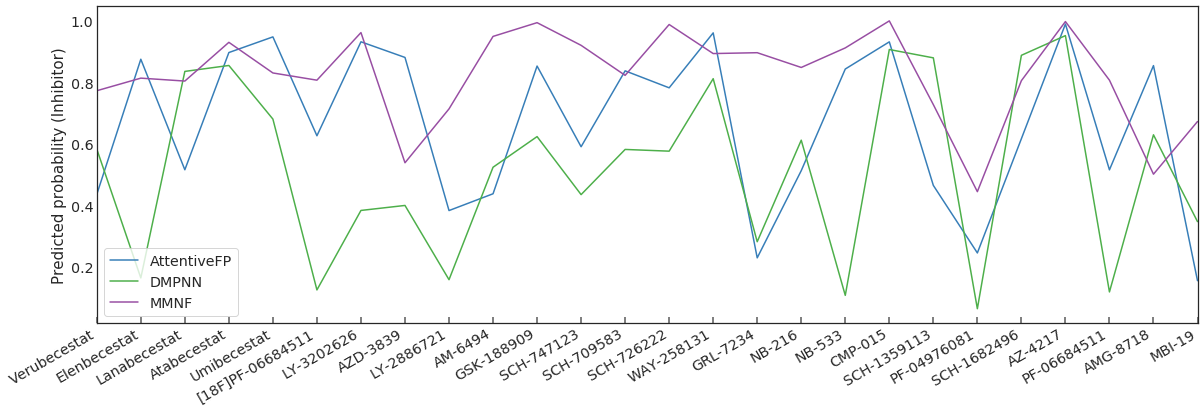

In [9]:
sns.set(style='white', palette='deep', font='sans-serif', font_scale=1.3)
ax = df.set_index('name')[net].plot(figsize=(17, 6), colors = colors)

# ax.tick_params(axis="x",direction="in", length  = 8, color = '0.9')

ax.set_xticks(list(range(len(df))))
ax.set_xticklabels(df.name, rotation=30, ha='right')
ax.set_ylabel('Predicted probability (Inhibitor)', fontsize = 15)
ax.tick_params(direction='in', length=6, width=2, color='grey',)
ax.xaxis.set_ticks_position('bottom')
ax.set_xlabel('')
ax.legend(loc = 'lower left')
plt.tight_layout()
plt.savefig('./drugs.svg')

In [10]:
df.to_csv('./drugs_predict_all.csv')